In [360]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [361]:
# model
model = Sequential()
model.add(LSTM(10))
model.add(Dropout(0.3))
model.add(Dense(1, activation='tanh'))

In [363]:
model.compile(optimizer='adam', loss='mse')

In [377]:
sequence = np.sin(np.arange(-50*np.pi, 50*np.pi, 0.1))
steps = 20

xTrain = []
yTrain = []
    
for i in range(0,len(sequence)-steps, 1):
    xTrain.append(sequence[i:i+steps])
    yTrain.append(sequence[i+steps])
    
xTrain = np.array(xTrain)
yTrain = np.array(yTrain)

xTrain = xTrain.reshape(xTrain.shape[0],xTrain.shape[1],1)

print(xTrain.shape)
print(yTrain.shape)

(3122, 20, 1)
(3122,)


In [379]:
EPOCHS = 20
BATCH_SIZE = 1

history = model.fit(xTrain, yTrain, epochs=EPOCHS, batch_size=BATCH_SIZE,verbose=1)

Train on 3122 samples
Epoch 1/20
3122/3122 [==============================] - 10s 3ms/sample - loss: 0.0429
Epoch 2/20
3122/3122 [==============================] - 9s 3ms/sample - loss: 0.0111
Epoch 3/20
3122/3122 [==============================] - 9s 3ms/sample - loss: 0.0081
Epoch 4/20
3122/3122 [==============================] - 9s 3ms/sample - loss: 0.0075
Epoch 5/20
3122/3122 [==============================] - 10s 3ms/sample - loss: 0.0074
Epoch 6/20
3122/3122 [==============================] - 10s 3ms/sample - loss: 0.0068
Epoch 7/20
3122/3122 [==============================] - 10s 3ms/sample - loss: 0.0069
Epoch 8/20
3122/3122 [==============================] - 9s 3ms/sample - loss: 0.0066
Epoch 9/20
3122/3122 [==============================] - 9s 3ms/sample - loss: 0.0065
Epoch 10/20
3122/3122 [==============================] - 9s 3ms/sample - loss: 0.0068
Epoch 11/20
3122/3122 [==============================] - 10s 3ms/sample - loss: 0.0065
Epoch 12/20
3122/3122 [=============

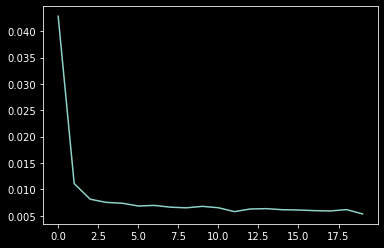

In [380]:
plt.plot(history.history['loss'])

In [447]:
testValues  = np.sin(np.arange(0, 10*np.pi, 0.1))

results = []

for i in range(len(values)-steps):
    testInput = testValues[i : i+steps]
    testInput = testInput.reshape((1, steps, 1))
    y = model.predict(testInput, verbose=0)
    results.append(*y[0])
    

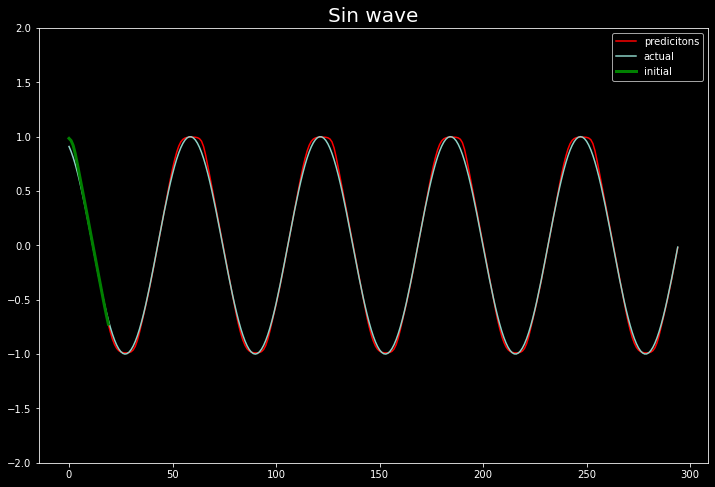

In [450]:
plt.figure(figsize=(12,8))
plt.title('Sin wave', fontsize=20)

plt.plot(results, label="predicitons", color='red')
plt.plot(testValues[20:], label="actual")
plt.plot(results[:20], label="initial", color='green', linewidth=3)

plt.legend(loc=0)
plt.ylim(-2, 2)
plt.show()

In [451]:
testValues  = np.cos(np.arange(0, 10*np.pi, 0.1))

results = []

for i in range(len(values)-steps):
    testInput = testValues[i : i+steps]
    testInput = testInput.reshape((1, steps, 1))
    y = model.predict(testInput, verbose=0)
    results.append(*y[0])

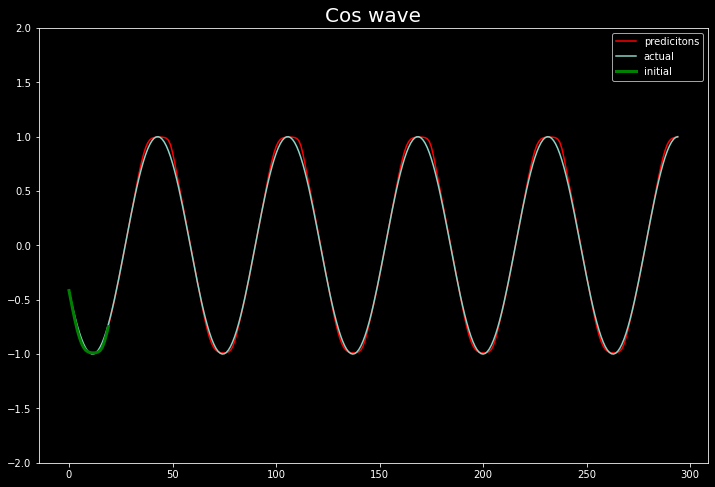

In [452]:
plt.figure(figsize=(12,8))
plt.title('Cos wave', fontsize=20)

plt.plot(results, label="predicitons", color='red')
plt.plot(testValues[20:], label="actual")
plt.plot(results[:20], label="initial", color='green', linewidth=3)

plt.legend(loc=0)
plt.ylim(-2, 2)
plt.show()